<a href="https://colab.research.google.com/github/podo1skii/spbu_diploma/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-contrib-python

In [2]:
# import the necessary packages
from imutils import paths
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
from functools import reduce
import operator
drive.mount('{ENTER YOUR MOUNT POINT}')
output_file = 'output.png'

Mounted at /content/drive


In [33]:
dir = "{ENTER YOUR PATH}"

print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images(dir)))
imagePaths.reverse()
images = []
color_images = []

for imagePath in imagePaths[len(imagePaths) - 4:]:
	image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
	color_image = cv2.imread(imagePath, cv2.IMREAD_COLOR)
	images.append(image)
	color_images.append(color_image)

print(imagePaths)
print(len(images))

[INFO] loading images...
['/content/drive/My Drive/Cars/3/4074_l.png', '/content/drive/My Drive/Cars/3/3789_l.png', '/content/drive/My Drive/Cars/3/3533_l.png', '/content/drive/My Drive/Cars/3/3274_l.png', '/content/drive/My Drive/Cars/3/2988_l.png', '/content/drive/My Drive/Cars/3/2696_l.png', '/content/drive/My Drive/Cars/3/2444_l.png', '/content/drive/My Drive/Cars/3/2175_l.png', '/content/drive/My Drive/Cars/3/1895_l.png', '/content/drive/My Drive/Cars/3/1620_l.png', '/content/drive/My Drive/Cars/3/1318_l.png', '/content/drive/My Drive/Cars/3/1010_l.png', '/content/drive/My Drive/Cars/3/0702_l.png', '/content/drive/My Drive/Cars/3/0449_l.png']
4


In [ ]:
resInputImage = color_images[0]
for i in range(1, len(images)):
		resInputImage = np.concatenate((resInputImage, color_images[i]))
cv2_imshow(resInputImage)
cv2.imwrite("input_stitching.jpg",resInputImage)

In [ ]:
for image in images:
		cv2_imshow(image)

In [15]:
def getImageMainLayer(image, isColor):

  if (image.shape[0] <= 300):
    return image

  if (isColor == True):
    minHeight = 0
  else:
    minHeight = int(image.shape[0]/2)-150
  maxHeight = int(image.shape[0]/2)+150
  return image[minHeight:maxHeight,:]

def getImageWOLight(image):
  return image[:,250:950] 

def getResultedImagePaddingSize(image):
  if (image.shape[0] <= 300):
    return 0
  return int(image.shape[0]/2)+150 - image.shape[0] 

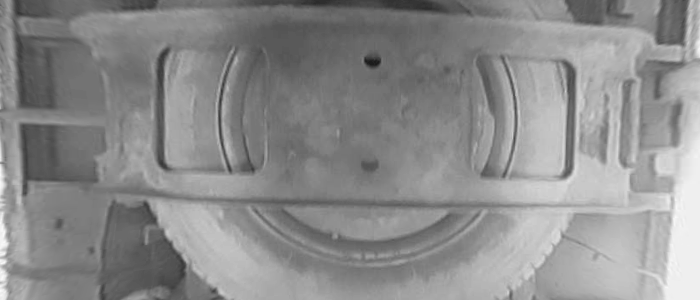

In [16]:
for image in images[2:3]:
		cv2_imshow(getImageWOLight(getImageMainLayer(image, False)))

In [19]:
def getSeamIndex(baseImage, newImage):
  minNorm = 10000000
  seamIndex = 0

  seamLineHeight = 30

  def norm(i1, i2):

    def diff(m1, m2):
      resultMatrix = np.zeros((len(m1), len(m1[0])))
      for i in range(len(m1)):
        for j in range(len(m1[0])):
          resultMatrix[i][j] = abs(int(m1[i][j]) - int(m2[i][j]))
      return resultMatrix

    result = np.matrix(getImageWOLight(diff(i1, i2))).mean()
    return result

  baseImageHeight = baseImage.shape[0];
  newImageHeight = newImage.shape[0];

  for i in range(1, newImageHeight - baseImageHeight, 10):
    newNorm = norm(baseImage[baseImageHeight - seamLineHeight:, :], newImage[i:i+seamLineHeight, :])
    if minNorm > newNorm:
      # print("NEW NORM:" + str(newNorm))
      minNorm = newNorm
      seamIndex = i
  # print("SEAM INDEX:"+ str(seamIndex))
  return seamIndex + seamLineHeight

In [25]:
def stitchImages(images, color_images):

  paddingSize = getResultedImagePaddingSize(images[0])

  print("SIZE OF FIRST IMAGE: " + str(images[0].shape))
  resultedImage = color_images[0][:paddingSize]

  print("START PROCESSING...")
  print("PADDING SIZE: " + str(paddingSize))
  for i in range(len(images)-1):
    print("SIZE OF IMAGE: " + str(images[i+1].shape))
    seam = getSeamIndex(getImageMainLayer(images[i], False),images[i+1])

    if i == (len(images)-2):
       resultedImage = np.concatenate((resultedImage, color_images[i+1][seam:,:]))
    else:
      resultedImage = np.concatenate((resultedImage, getImageMainLayer(color_images[i+1], True)[seam:,:]))
    print("RES IMAGE SIZE: " + str(resultedImage.shape))
  return resultedImage

In [ ]:
image = stitchImages(images, color_images)
cv2_imshow(image)
cv2.imwrite("output_stitching.jpg",image)